<a href="https://colab.research.google.com/github/LeeSeungYun1020/Machine_Learning/blob/main/colab/Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀

## Linear Regression
선형 회귀

In [1]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [5]:
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [8]:
diabetes.data[0:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

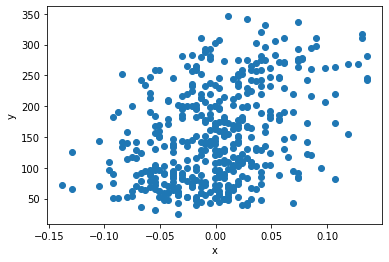

In [11]:
import matplotlib.pyplot as plt
plt.scatter(diabetes.data[:, 9], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size = 0.3, random_state=82)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(309, 10) (133, 10) (309,) (133,)


In [18]:
from sklearn.linear_model import LinearRegression
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(x_train, y_train)
predicted = linearRegressionModel.predict(x_test)

In [21]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import numpy as np

print(np.sqrt(mean_squared_error(y_test, predicted)))
print(np.sqrt(mean_squared_log_error(y_test, predicted)))
print(linearRegressionModel.score(x_test, y_test))

57.6811522546071
0.4375075845063971
0.39715036214055843


## Stochastic Gradient Descent
경사하강법

In [25]:
from sklearn.linear_model import SGDRegressor
sGDRegressionModel = SGDRegressor(max_iter=10000)
sGDRegressionModel.fit(x_train, y_train)
predicted = sGDRegressionModel.predict(x_test)

In [26]:
print(np.sqrt(mean_squared_error(y_test, predicted)))
print(np.sqrt(mean_squared_log_error(y_test, predicted)))
print(linearRegressionModel.score(x_test, y_test))

55.995736041391304
0.43494307782239217
0.39715036214055843


# 분류

## 

In [27]:
from sklearn.datasets import load_digits
digits = load_digits()

In [30]:
print(digits.data.shape, digits.target.shape)

(1797, 64) (1797,)


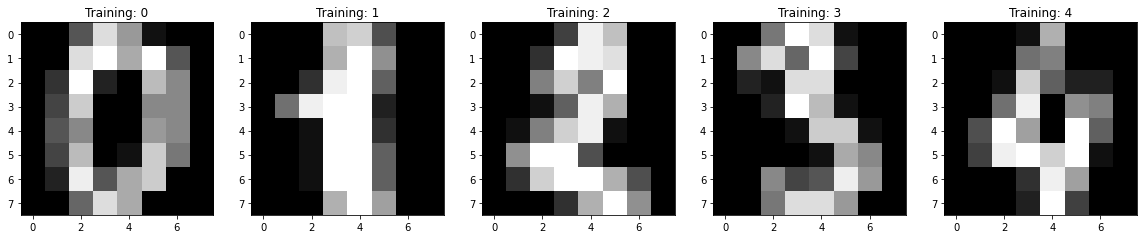

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
  plt.title(f"Training: {label}")

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=82)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1257, 64) (540, 64) (1257,) (540,)


In [54]:
from sklearn.linear_model import LogisticRegression
logisticRegressionModel = LogisticRegression(max_iter=5000)
logisticRegressionModel.fit(x_train, y_train)
predicted = logisticRegressionModel.predict(x_test)

In [55]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
print(precision_score(y_test, predicted, average="micro"))
print(recall_score(y_test, predicted, average="micro"))
print(f1_score(y_test, predicted, average="micro"))

0.9574074074074074
0.9574074074074074
0.9574074074074074


In [64]:
from collections import Counter

print(confusion_matrix(y_test, predicted))
print(Counter([(test, test == predict) for test, predict in zip(y_test, predicted)]))

[[63  0  0  0  1  0  0  0  0  0]
 [ 0 53  0  0  1  0  1  0  0  0]
 [ 0  0 52  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  3  0  0  1  0]
 [ 0  2  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0 56  0  0  0  1]
 [ 0  0  0  0  0  0 50  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  1]
 [ 0  5  1  0  1  1  0  1 52  0]
 [ 0  0  0  0  0  1  0  0  1 52]]
Counter({(0, True): 63, (5, True): 56, (3, True): 53, (1, True): 53, (2, True): 52, (8, True): 52, (9, True): 52, (6, True): 50, (7, True): 47, (4, True): 39, (8, False): 9, (3, False): 4, (4, False): 2, (9, False): 2, (7, False): 2, (1, False): 2, (0, False): 1, (5, False): 1})


In [57]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        64
           1       0.88      0.96      0.92        55
           2       0.98      1.00      0.99        52
           3       1.00      0.93      0.96        57
           4       0.91      0.95      0.93        41
           5       0.92      0.98      0.95        57
           6       0.98      1.00      0.99        50
           7       0.98      0.96      0.97        49
           8       0.96      0.85      0.90        61
           9       0.96      0.96      0.96        54

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540

